In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [16]:
if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/DataRotacion.csv'

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

In [25]:
Data = pd.read_csv(Path_)
filtro = Data["angle"] == 30
resultado = Data[filtro]
resultado

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


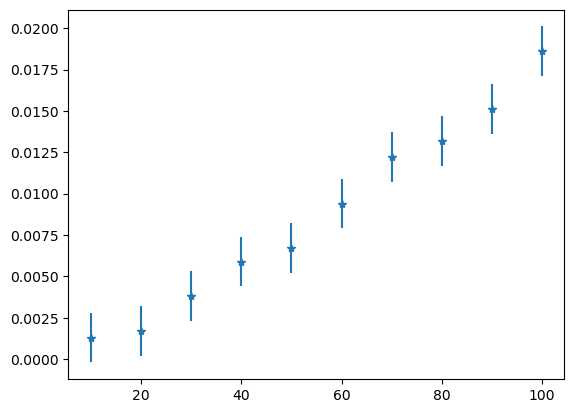

In [49]:
y_ = resultado["y"]
h_ =  resultado["h"]
sigmay_ = resultado["sigmay"]

plt.errorbar(h_,y_,sigmay_,fmt="*")

def GetModel(h,lamb,p,g=9.81):
    y = 2*np.sqrt(2)*(1/3)*p*np.cos(np.deg2rad(lamb))*np.sqrt(h**3/g)
    return y

def Chi2(p,h,y,sigmay,angle=30,g=9.81):
    return np.sum((y - GetModel(h,angle,p))**2/(2*sigmay**2))

p = np.ones(1)

nll = lambda *p: Chi2(*p)
result = spo.minimize(nll,p, args=(h_,y_,sigmay_),options={'disp':True})

In [51]:
#Obtención de omega
omega = result.x
omega

array([7.24399804e-05])

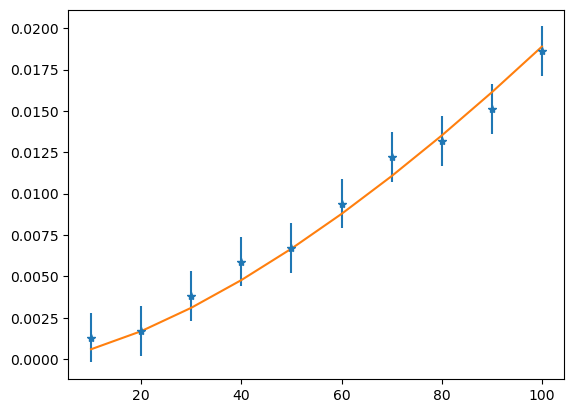

In [52]:
def GetModel(h,lamb,p,g=9.81):
    y = 2*np.sqrt(2)*(1/3)*p*np.cos(np.deg2rad(lamb))*np.sqrt(h**3/g)
    return y

Model = GetModel(h_,30,omega)

plt.errorbar(h_,y_,sigmay_,fmt="*")
plt.plot(h_,Model)